<a href="https://colab.research.google.com/github/PainappuruNyan/OrdersNCustomers/blob/main/orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5009 non-null   int64  
 1   order_date   5009 non-null   object 
 2   ship_mode    5009 non-null   object 
 3   customer_id  5009 non-null   object 
 4   sales        5009 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.8+ KB


In [ ]:
orders.head(15)

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,378.0
1,100090,2014-07-08,Standard,EB-13705,699.2
2,100293,2014-03-14,Standard,NF-18475,91.1
3,100328,2014-01-28,Standard,JC-15340,3.9
4,100363,2014-04-08,Standard,JM-15655,21.4
5,100391,2014-05-25,Standard,BW-11065,14.6
6,100678,2014-04-18,Standard,KM-16720,697.1
7,100706,2014-12-16,Second,LE-16810,129.4
8,100762,2014-11-24,Standard,NG-18355,508.6
9,100860,2014-03-26,Second,CS-12505,18.8


In [ ]:
orders['order_date'].describe()

count           5009
unique          1237
top       2016-09-05
freq              19
Name: order_date, dtype: object

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       793 non-null    object
 1   name     793 non-null    object
 2   segment  793 non-null    object
 3   state    793 non-null    object
 4   city     793 non-null    object
dtypes: object(5)
memory usage: 31.1+ KB


In [ ]:
customers = customers.rename(columns = {'id':'customer_id'})

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  793 non-null    object
 1   name         793 non-null    object
 2   segment      793 non-null    object
 3   state        793 non-null    object
 4   city         793 non-null    object
dtypes: object(5)
memory usage: 31.1+ KB


In [ ]:
pd.options.display.float_format = '{:,.1f}'.format

In [ ]:
orders['ship_mode'].value_counts()

Standard    2994
Second       964
First        787
Same Day     264
Name: ship_mode, dtype: int64

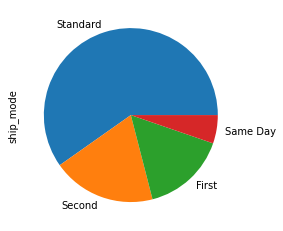

In [ ]:
orders['ship_mode'].value_counts().plot.pie()

In [ ]:
customers['segment'].value_counts()

Consumer       409
Corporate      236
Home Office    148
Name: segment, dtype: int64

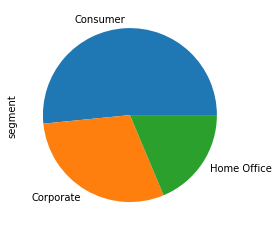

In [ ]:
customers['segment'].value_counts().plot.pie()

In [ ]:
customers['state'].value_counts()

California              161
New York                 87
Texas                    77
Pennsylvania             50
Illinois                 41
Ohio                     38
Washington               38
North Carolina           30
Florida                  24
Arizona                  21
Colorado                 20
Georgia                  17
Michigan                 16
Virginia                 15
Minnesota                13
Tennessee                13
Kentucky                 13
Indiana                  12
Massachusetts            10
New Jersey               10
Alabama                   9
Wisconsin                 9
Connecticut               7
Missouri                  6
Delaware                  6
Louisiana                 6
Utah                      6
Mississippi               5
Rhode Island              5
Maryland                  4
New Mexico                4
Oregon                    3
Iowa                      3
Oklahoma                  3
Arkansas                  2
New Hampshire       

In [ ]:
orders.groupby(['ship_mode', 'order_date', 'customer_id'])['sales'].agg(['sum']).sort_values(by='sum', ascending=False).head(10)

sum
ship_mode order_date customer_id         
Standard  2014-03-18 SM-20320    23,661.2
          2016-10-02 TC-20980    18,336.7
First     2017-03-23 RB-19360    14,052.5
          2017-10-22 TA-21385    13,716.5
Standard  2014-09-08 BM-11140    10,539.9
          2017-11-17 HL-15040    10,500.0
          2014-09-23 SC-20095     9,900.2
          2016-12-17 AB-10105     9,892.7
          2016-04-16 BS-11365     9,135.2
Second    2016-02-02 SE-20110     8,805.0

In [ ]:
order_by_customer = pd.merge(orders, customers)

In [ ]:
order_by_customer.head(10)

,id,order_date,ship_mode,customer_id,sales,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,378.0,Dennis Kane,Consumer,Ohio,Marion
1,131884,2015-12-06,Same Day,DK-13375,594.0,Dennis Kane,Consumer,Ohio,Marion
2,145065,2015-12-12,First,DK-13375,32.3,Dennis Kane,Consumer,Ohio,Marion
3,133046,2017-07-27,Second,DK-13375,298.0,Dennis Kane,Consumer,Ohio,Marion
4,165099,2017-12-11,First,DK-13375,1.4,Dennis Kane,Consumer,Ohio,Marion
5,166835,2017-11-12,Second,DK-13375,221.0,Dennis Kane,Consumer,Ohio,Marion
6,111290,2016-07-22,Standard,DK-13375,"1,137.4",Dennis Kane,Consumer,Ohio,Marion
7,139087,2016-07-17,Second,DK-13375,656.4,Dennis Kane,Consumer,Ohio,Marion
8,100090,2014-07-08,Standard,EB-13705,699.2,Ed Braxton,Corporate,Ohio,Akron
9,129938,2014-12-15,Second,EB-13705,445.8,Ed Braxton,Corporate,Ohio,Akron


In [ ]:
top_city = order_by_customer.groupby('city')['sales'].sum()

In [ ]:
top_city.sort_values(ascending=False).head(10)

city
New York City   210,927.0
Los Angeles     141,770.8
Philadelphia    130,921.2
Seattle         108,638.2
San Francisco   107,084.1
Houston          87,156.5
Chicago          61,351.3
San Diego        39,816.4
Columbus         39,808.7
Monroe           35,707.0
Name: sales, dtype: float64

In [ ]:
top_city_5 = top_city.sort_values(ascending=False).head(5)

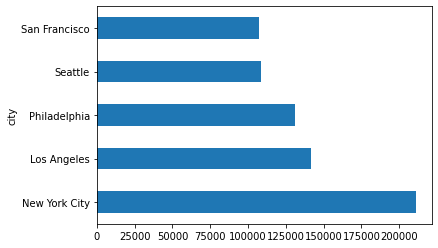

In [ ]:
top_city_5.plot(kind = 'barh')

In [ ]:
orders_5_years = orders.query("order_date >= '2011-01-01' & order_date <= '2016-12-31'")

In [ ]:
orders_5_years.value_counts()

id      order_date  ship_mode  customer_id  sales  
169971  2016-09-04  Standard   IL-15100     66.3       1
123260  2014-08-26  Standard   FM-14290     176.8      1
123414  2016-08-21  Standard   SU-20665     37.3       1
123400  2014-02-02  Standard   EB-13930     199.3      1
123358  2016-04-10  Standard   BT-11680     892.0      1
                                                      ..
146325  2016-12-14  First      DS-13180     216.2      1
146318  2016-01-22  Standard   MC-17275     13.0       1
146290  2015-05-04  Standard   SV-20815     125.9      1
146283  2014-09-08  Standard   KT-16465     1,166.7    1
100006  2014-09-07  Standard   DK-13375     378.0      1
Length: 3322, dtype: int64

In [ ]:
ship_mode_filter = 'First'
orders_5_years_first = orders_5_years.query('ship_mode == @ship_mode_filter')

In [ ]:
orders_5_years_first.head(10)

,id,order_date,ship_mode,customer_id,sales
15,101147,2014-12-02,First,MC-17575,2.4
22,101476,2014-09-12,First,SD-20485,70.0
24,101602,2014-12-15,First,MC-18100,804.0
27,101931,2014-10-28,First,TS-21370,"1,252.6"
38,103058,2014-07-23,First,AG-10270,100.0
40,103100,2014-12-20,First,AB-10105,"1,107.7"
44,103317,2014-07-05,First,DM-13525,242.5
46,103366,2014-01-15,First,EH-13990,149.9
49,103429,2014-05-30,First,LW-16825,765.5
60,103989,2014-03-19,First,MC-17605,590.8


In [ ]:
customer_city_filter = 'California'

In [ ]:
filter_customers = customers.query('state == @customer_city_filter')

In [ ]:
filter_customers.head(10)

,customer_id,name,segment,state,city
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
9,ZD-21925,Zuschuss Donatelli,Consumer,California,San Francisco
13,EH-13945,Eric Hoffmann,Consumer,California,Los Angeles
19,RA-19885,Ruben Ausman,Corporate,California,Los Angeles
27,KM-16720,Kunst Miller,Consumer,California,Los Angeles
35,DN-13690,Duane Noonan,Consumer,California,San Francisco
40,JS-15685,Jim Sink,Corporate,California,Los Angeles
44,KD-16345,Katherine Ducich,Consumer,California,San Francisco
60,LS-16975,Lindsay Shagiari,Home Office,California,Los Angeles


In [ ]:
city_order = pd.merge(filter_customers, orders)

In [ ]:
city_order.shape

(1006, 9)

In [ ]:
orders['order_date'] = pd.to_datetime(orders['order_date'])

In [ ]:
orders = orders.set_index('order_date')

In [ ]:
grouped_orders = orders.groupby(pd.Grouper(level="order_date", freq="Y"))['sales'].agg(['sum'])

In [ ]:
grouped_orders.head(5)

,sum
order_date,
2014-12-31,"484,247.5"
2015-12-31,"470,532.5"
2016-12-31,"609,205.6"
2017-12-31,"733,215.3"
